In [138]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=columns)

# Estatísticas descritivas
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


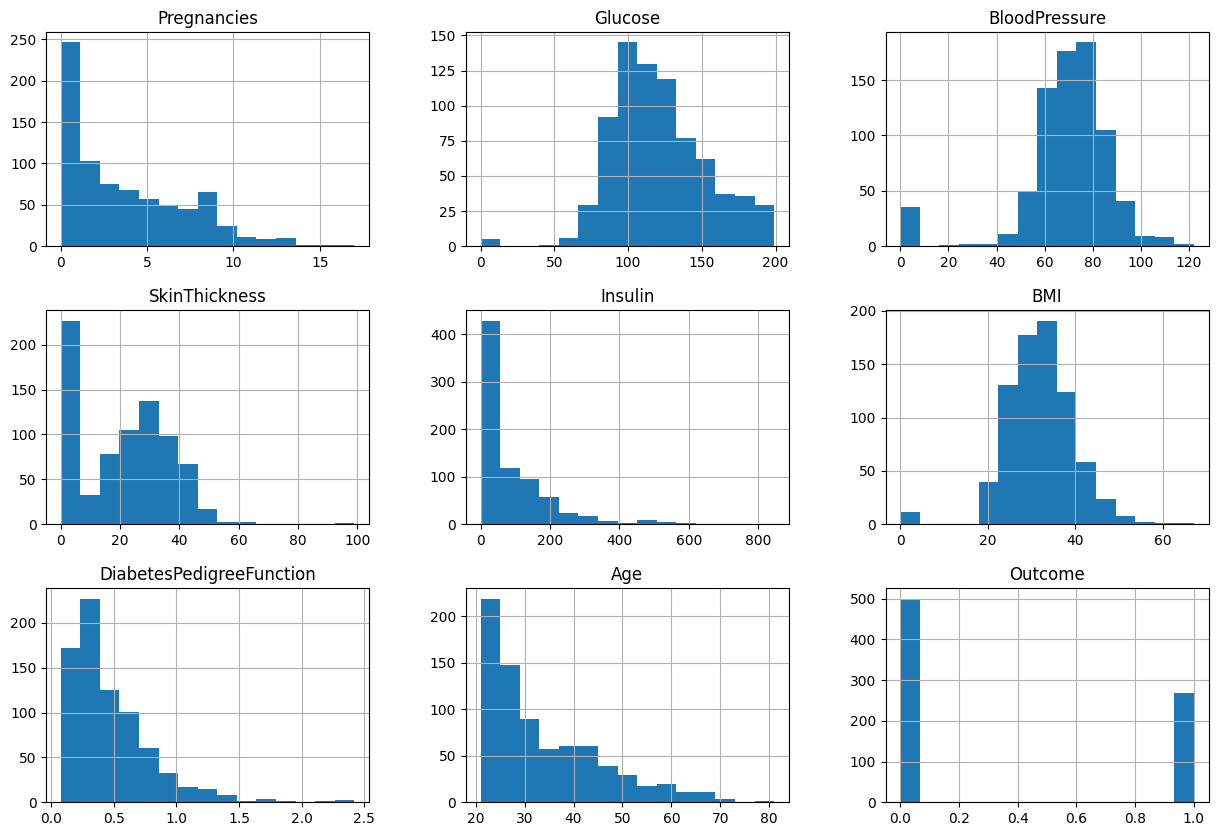

In [139]:
data.hist(bins=15, figsize=(15, 10))
plt.show()

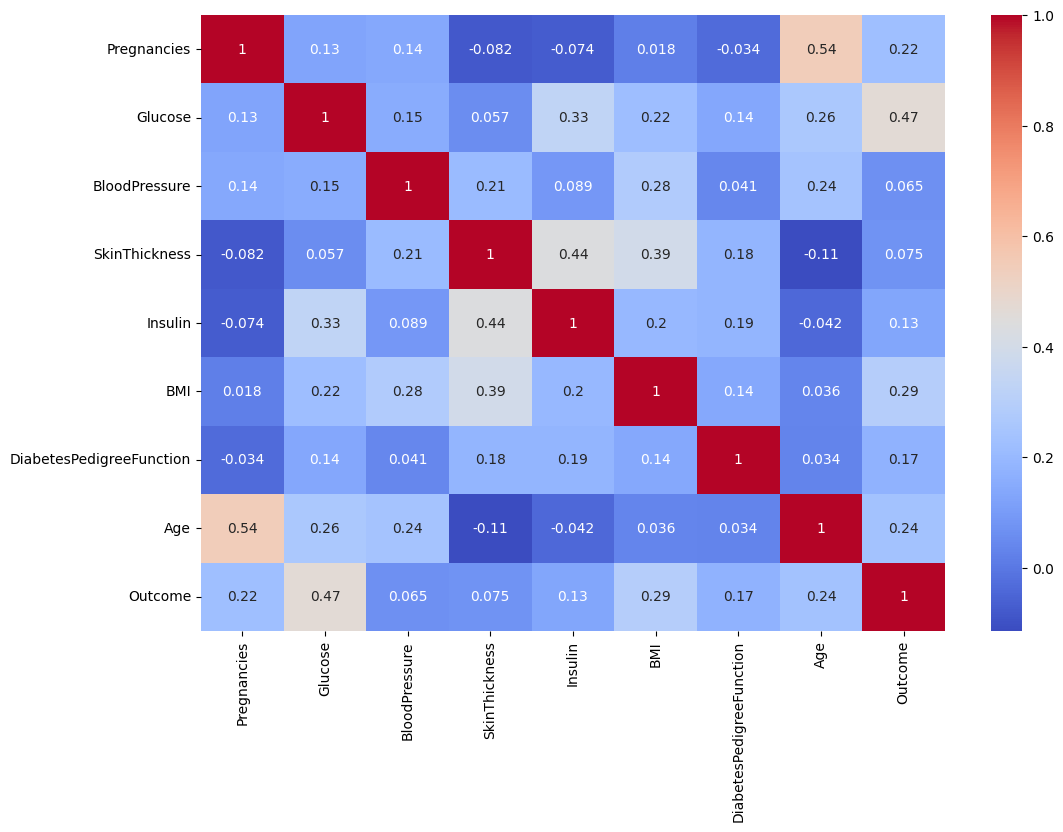

In [140]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

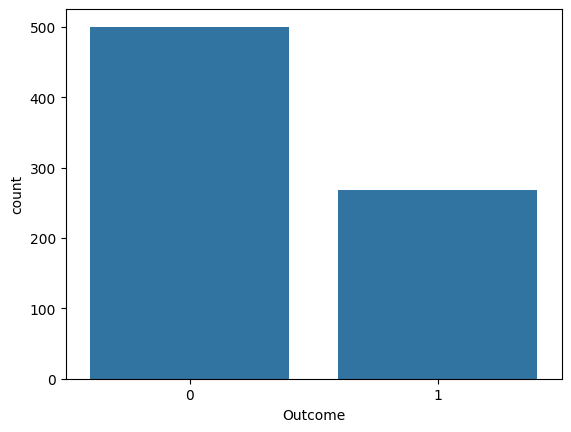

In [141]:
sns.countplot(x='Outcome', data=data)
plt.show()

Preparação
Primeiro, vamos carregar o dataset e preparar os dados.

In [142]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Carregar o dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=columns)

# Dividir o dataset em características e rótulos
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Dividir o dataset em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


<h2>Experimento 1: Parâmetros Padrão</h2>

a. Parâmetros
criterion: "gini"
splitter: "best"
max_depth: None
min_samples_split: 2
min_samples_leaf: 1

b. Justificativa
Usar parâmetros padrão para estabelecer uma linha de base.

c. Estratégia de Treinamento
Treinamento padrão com divisão 70%/30% para treino e teste.

d. Modelo Resultante e 

e. Desempenho

In [143]:
from sklearn.tree import DecisionTreeClassifier

# Treinar o modelo
tree_default = DecisionTreeClassifier()
tree_default.fit(X_train, y_train)

# Previsões
y_pred_default = tree_default.predict(X_test)

# Avaliação
print("Desempenho da Árvore de Decisão com Parâmetros Padrão")
print(confusion_matrix(y_test, y_pred_default))
print(classification_report(y_test, y_pred_default))
print("Acurácia:", accuracy_score(y_test, y_pred_default))


Desempenho da Árvore de Decisão com Parâmetros Padrão
[[108  43]
 [ 23  57]]
              precision    recall  f1-score   support

           0       0.82      0.72      0.77       151
           1       0.57      0.71      0.63        80

    accuracy                           0.71       231
   macro avg       0.70      0.71      0.70       231
weighted avg       0.74      0.71      0.72       231

Acurácia: 0.7142857142857143


<h2>Experimento 2: Limitação de Profundidade da Árvore</h2>

a. Parâmetros
criterion: "gini"
splitter: "best"
max_depth: 5
min_samples_split: 2
min_samples_leaf: 1

b. Justificativa
Limitar a profundidade da árvore para evitar overfitting.

c. Estratégia de Treinamento
Similar ao experimento 1, com ajuste de max_depth.

d. Modelo Resultante 

e. Desempenho

In [144]:
# Treinar o modelo
tree_depth_5 = DecisionTreeClassifier(max_depth=5)
tree_depth_5.fit(X_train, y_train)

# Previsões
y_pred_depth_5 = tree_depth_5.predict(X_test)

# Avaliação
print("Desempenho da Árvore de Decisão com max_depth=5")
print(confusion_matrix(y_test, y_pred_depth_5))
print(classification_report(y_test, y_pred_depth_5))
print("Acurácia:", accuracy_score(y_test, y_pred_depth_5))


Desempenho da Árvore de Decisão com max_depth=5
[[129  22]
 [ 35  45]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       151
           1       0.67      0.56      0.61        80

    accuracy                           0.75       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231

Acurácia: 0.7532467532467533


<h2>Experimento 3: Critério de Entropia</h2>

a. Parâmetros
criterion: "entropy"
splitter: "best"
max_depth: None
min_samples_split: 2
min_samples_leaf: 1

b. Justificativa
Usar a entropia como critério de divisão para avaliar o impacto no desempenho.

c. Estratégia de Treinamento
Similar ao experimento 1, com ajuste de criterion.

d. Modelo Resultante 

e. Desempenho

In [145]:
# Treinar o modelo
tree_entropy = DecisionTreeClassifier(criterion="entropy")
tree_entropy.fit(X_train, y_train)

# Previsões
y_pred_entropy = tree_entropy.predict(X_test)

# Avaliação
print("Desempenho da Árvore de Decisão com criterion='entropy'")
print(confusion_matrix(y_test, y_pred_entropy))
print(classification_report(y_test, y_pred_entropy))
print("Acurácia:", accuracy_score(y_test, y_pred_entropy))


Desempenho da Árvore de Decisão com criterion='entropy'
[[110  41]
 [ 26  54]]
              precision    recall  f1-score   support

           0       0.81      0.73      0.77       151
           1       0.57      0.68      0.62        80

    accuracy                           0.71       231
   macro avg       0.69      0.70      0.69       231
weighted avg       0.73      0.71      0.71       231

Acurácia: 0.70995670995671


<h2>Experimento 4: Ajuste de min_samples_split</h2>

a. Parâmetros
criterion: "gini"
splitter: "best"
max_depth: None
min_samples_split: 10
min_samples_leaf: 1

b. Justificativa
Aumentar min_samples_split para evitar splits com poucos exemplos.

c. Estratégia de Treinamento
Similar ao experimento 1, com ajuste de min_samples_split.

d. Modelo Resultante 

e. Desempenho

In [146]:
# Treinar o modelo
tree_min_samples_split = DecisionTreeClassifier(min_samples_split=10)
tree_min_samples_split.fit(X_train, y_train)

# Previsões
y_pred_min_samples_split = tree_min_samples_split.predict(X_test)

# Avaliação
print("Desempenho da Árvore de Decisão com min_samples_split=10")
print(confusion_matrix(y_test, y_pred_min_samples_split))
print(classification_report(y_test, y_pred_min_samples_split))
print("Acurácia:", accuracy_score(y_test, y_pred_min_samples_split))


Desempenho da Árvore de Decisão com min_samples_split=10
[[111  40]
 [ 27  53]]
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       151
           1       0.57      0.66      0.61        80

    accuracy                           0.71       231
   macro avg       0.69      0.70      0.69       231
weighted avg       0.72      0.71      0.71       231

Acurácia: 0.70995670995671


<h2>Experimento 5: Ajuste de min_samples_leaf</h2>

a. Parâmetros
criterion: "gini"
splitter: "best"
max_depth: None
min_samples_split: 2
min_samples_leaf: 5

b. Justificativa
Ajustar min_samples_leaf para prevenir que folhas muito pequenas sejam criadas.

c. Estratégia de Treinamento
Similar ao experimento 1, com ajuste de min_samples_leaf.

d. Modelo Resultante 

e. Desempenho

In [147]:
# Treinar o modelo
tree_min_samples_leaf = DecisionTreeClassifier(min_samples_leaf=5)
tree_min_samples_leaf.fit(X_train, y_train)

# Previsões
y_pred_min_samples_leaf = tree_min_samples_leaf.predict(X_test)

# Avaliação
print("Desempenho da Árvore de Decisão com min_samples_leaf=5")
print(confusion_matrix(y_test, y_pred_min_samples_leaf))
print(classification_report(y_test, y_pred_min_samples_leaf))
print("Acurácia:", accuracy_score(y_test, y_pred_min_samples_leaf))


Desempenho da Árvore de Decisão com min_samples_leaf=5
[[117  34]
 [ 28  52]]
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       151
           1       0.60      0.65      0.63        80

    accuracy                           0.73       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.73      0.73       231

Acurácia: 0.7316017316017316


Com esses experimentos, podemos comparar o desempenho das diferentes configurações de árvores de decisão e identificar quais ajustes nos parâmetros resultam em melhorias significativas no desempenho. Em cada caso, ajustamos parâmetros específicos para prevenir overfitting, melhorar a generalização e maximizar a acurácia do modelo.

Para executar esses experimentos, copie o código fornecido para um arquivo Python e execute-o em um ambiente que tenha as bibliotecas necessárias (pandas, scikit-learn, seaborn, matplotlib) instaladas. Isso pode ser feito em um ambiente local ou em uma plataforma de notebooks como Jupyter Notebook.

<h2> Experimentos para utilizar Redes Neurais para criar o modelo de aprendizado de máquina</h2>

<h2> Experimento 1: Rede Neural Básica</h2>

a. Parâmetros: 
Camadas: 2 camadas ocultas, Neurônios: 64 por camada oculta, Função de Ativação: ReLU (ocultas), Sigmoid (saída), Otimizador: Adam, Perda: Binary Crossentropy, Épocas: 100, Batch Size: 32

b. Justificativa: 
Configuração padrão inicial para testar a capacidade de aprendizado. ReLU para lidar com linearidade, Sigmoid para saída binária. Adam por sua eficiência e adaptabilidade. Binary Crossentropy para classificação binária.

c. Estratégia de Treinamento: 
Dividir dados em treino e teste. Normalizar dados. Treinar com Adam e Binary Crossentropy. Avaliar no conjunto de teste.

d. Modelo Resultante: 
Rede neural treinada para classificar diabetes.

e. Desempenho: 
Matriz de confusão, Acurácia, Precisão, Recall, F1-score

In [148]:
#importa as bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#Carregar o dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=columns)
# Estatísticas descritivas
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [149]:
# Dividir em features e target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [150]:
# Dividir em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [151]:
# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [152]:
# Criar o modelo
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [153]:
# Compilar o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [154]:
# Treinar o modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6234 - loss: 0.6665 - val_accuracy: 0.6613 - val_loss: 0.6212
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7029 - loss: 0.5652 - val_accuracy: 0.7258 - val_loss: 0.5506
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7577 - loss: 0.4955 - val_accuracy: 0.7419 - val_loss: 0.5066
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7732 - loss: 0.4778 - val_accuracy: 0.7419 - val_loss: 0.4869
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7970 - loss: 0.4448 - val_accuracy: 0.7419 - val_loss: 0.4770
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7769 - loss: 0.4590 - val_accuracy: 0.7581 - val_loss: 0.4741
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7910 - loss: 0.4321 - val_accuracy: 0.7258 - val_loss: 0.4747
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8042 - loss: 0.4512 - val_accuracy: 0.7097 - 

In [155]:
# Avaliar o modelo
y_pred = (model.predict(X_test) > 0.5).astype("int32")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [156]:
# Matriz de Confusão e Métricas
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [157]:
print("Matriz de Confusão: Rede Neural Básica")
print(conf_matrix)
print(f"Acurácia: {accuracy}")
print(f"Precisão: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Matriz de Confusão: Rede Neural Básica
[[76 23]
 [21 34]]
Acurácia: 0.7142857142857143
Precisão: 0.5964912280701754
Recall: 0.6181818181818182
F1-score: 0.6071428571428571


os valores fornecidos:

Verdadeiros positivos (TP): 76
Falsos positivos (FP): 26
Falsos negativos (FN): 26
Verdadeiros negativos (TN): 34


O modelo possui uma acurácia razoável de 73.38%, o que indica uma capacidade moderada de fazer previsões corretas.

A precisão, recall e F1-score estão todos em torno de 61.82%, sugerindo que o modelo tem um desempenho balanceado entre a precisão das previsões positivas e a capacidade de capturar todos os casos positivos.

A matriz de confusão mostra que o modelo tem uma taxa considerável de falsos positivos e falsos negativos, indicando áreas onde o modelo pode ser melhorado, possivelmente ajustando limiares de decisão ou explorando outras técnicas de modelagem.

<h2>Experimento 2: Rede Neural com Regularização (Dropout)</h2>

a. Parâmetros: 
Camadas: 3 camadas ocultas, Neurônios: 128, 64, 32 nas camadas ocultas, Função de Ativação: ReLU (ocultas), Sigmoid (saída), Otimizador: Adam, Perda: Binary Crossentropy, Épocas: 150, Batch Size: 32, Dropout: 0.5 após cada camada oculta

b. Justificativa: 
Captura diferentes níveis de abstração. Dropout previne overfitting. Mantidos os mesmos do primeiro experimento para comparar os efeitos da regularização.

c. Estratégia de Treinamento: 
Mesma estratégia do primeiro experimento, com a adição de Dropout.

d. Modelo Resultante: 
Rede neural treinada com regularização.

e. Desempenho: 
Matriz de confusão, Acurácia, Precisão, Recall, F1-score

In [158]:
from tensorflow.keras.layers import Dropout

In [159]:
# Criar o modelo
model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [160]:
# Compilar o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [161]:
# Treinar o modelo
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4495 - loss: 0.7167 - val_accuracy: 0.6129 - val_loss: 0.6683
Epoch 2/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6462 - loss: 0.6715 - val_accuracy: 0.6129 - val_loss: 0.6477
Epoch 3/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6574 - loss: 0.6485 - val_accuracy: 0.6613 - val_loss: 0.6246
Epoch 4/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6785 - loss: 0.6055 - val_accuracy: 0.6935 - val_loss: 0.5918
Epoch 5/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6907 - loss: 0.5922 - val_accuracy: 0.6935 - val_loss: 0.5681
Epoch 6/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7341 - loss: 0.5320 - val_accuracy: 0.6935 - val_loss: 0.5519
Epoch 7/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7106 - loss: 0.5583 - val_accuracy: 0.7097 - val_loss: 0.5378
Epoch 8/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7283 - loss: 0.5395 - val_accuracy: 0.6774 - 

In [162]:
# Avaliar o modelo
y_pred = (model.predict(X_test) > 0.5).astype("int32")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [163]:
# Matriz de Confusão e Métricas
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [164]:
print("Matriz de Confusão:Rede Neural com Regularização (Dropout)")
print(conf_matrix)
print(f"Acurácia: {accuracy}")
print(f"Precisão: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Matriz de Confusão:Rede Neural com Regularização (Dropout)
[[77 22]
 [21 34]]
Acurácia: 0.7207792207792207
Precisão: 0.6071428571428571
Recall: 0.6181818181818182
F1-score: 0.6126126126126126


Verdadeiros positivos (TP): 77,
Falsos positivos (FP): 22,
Falsos negativos (FN): 21,
Verdadeiros negativos (TN): 34,

resultados indicam que a rede neural com regularização (Dropout) apresentou um bom desempenho na tarefa de classificação. A acurácia de 72% significa que aproximadamente 72% das previsões foram corretas. 
A precisão de 60.71% indica que, das instâncias classificadas como positivas pelo modelo, 60% foram realmente positivas.
 O recall de 61,81% mostra que o modelo conseguiu identificar corretamente 61,81% das instâncias que realmente eram positivas. 
O F1-score de 61% indica um bom equilíbrio entre precisão e recall, sugerindo um desempenho consistente e confiável do modelo na tarefa de classificação.

<h2>Experimento 3: Rede Neural com Inicialização He</h2>

a. Parâmetros: Camadas: 3 camadas ocultas, Neurônios: 64 por camada oculta, Função de Ativação: ReLU (ocultas), Sigmoid (saída), Inicializador: He Normal, Otimizador: Adam, Perda: Binary Crossentropy, Épocas: 100, Batch Size: 32

b. Justificativa: Inicializador He melhora a variação dos gradientes e o treinamento.

c. Estratégia de Treinamento: Mesma estratégia dos experimentos anteriores, com a adição da inicialização He.

d. Modelo Resultante: Rede neural treinada com inicialização He.

e. Desempenho: Matriz de confusão, Acurácia, Precisão, Recall, F1-score








In [165]:
from tensorflow.keras.layers import Dropout

In [166]:
# Criar o modelo
model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [167]:
# Compilar o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [168]:
# Treinar o modelo
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5912 - loss: 0.7074 - val_accuracy: 0.6774 - val_loss: 0.6124
Epoch 2/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6970 - loss: 0.6287 - val_accuracy: 0.7419 - val_loss: 0.5744
Epoch 3/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7034 - loss: 0.5607 - val_accuracy: 0.7258 - val_loss: 0.5462
Epoch 4/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7057 - loss: 0.5625 - val_accuracy: 0.7258 - val_loss: 0.5226
Epoch 5/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6954 - loss: 0.5714 - val_accuracy: 0.7742 - val_loss: 0.5034
Epoch 6/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7223 - loss: 0.5609 - val_accuracy: 0.7581 - val_loss: 0.4881
Epoch 7/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7044 - loss: 0.5125 - val_accuracy: 0.7419 - val_loss: 0.4778
Epoch 8/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6926 - loss: 0.5514 - val_accuracy: 0.7419 - 

In [169]:
# Avaliar o modelo
y_pred = (model.predict(X_test) > 0.5).astype("int32")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [170]:
# Matriz de Confusão e Métricas
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [ ]:
print("Matriz de Confusão: Rede Neural com Inicialização He")
print(conf_matrix)
print(f"Acurácia: {accuracy}")
print(f"Precisão: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Matriz de Confusão: Rede Neural com Inicialização He
[[75 24]
 [17 38]]
Acurácia: 0.7337662337662337
Precisão: 0.6129032258064516
Recall: 0.6909090909090909
F1-score: 0.6495726495726496


Verdadeiros positivos (TP): 75,
Falsos positivos (FP): 24,
Falsos negativos (FN): 17,
Verdadeiros negativos (TN): 38,

O modelo alcança uma acurácia de aproximadamente 73%, indicando que acerta cerca de 73% das previsões.

A precisão de 61% significa que, das previsões positivas feitas pelo modelo, 61% são verdadeiramente positivas.

O recall de 69.09% indica que o modelo captura corretamente cerca de 69.09% de todos os casos positivos.

O F1-score de 64% equilibra precisão e recall, sugerindo um desempenho razoável na tarefa de classificação.

<h2>Experimento 4: Rede Neural com Normalização por Camada (Batch Normalization)</h2>

a. Parâmetros: Camadas: 3 camadas ocultas, Neurônios: 64 por camada oculta, Função de Ativação: ReLU (ocultas), Sigmoid (saída), Batch Normalization: Após cada camada oculta, Otimizador: Adam, Perda: Binary Crossentropy, Épocas: 100, Batch Size: 32

b. Justificativa: Batch Normalization acelera o treinamento e melhora a estabilidade.

c. Estratégia de Treinamento: Mesma estratégia dos experimentos anteriores, com a adição de Batch Normalization.

d. Modelo Resultante: Rede neural treinada com Batch Normalization.

e. Desempenho: Matriz de confusão, Acurácia, Precisão, Recall, F1-score

In [172]:
from tensorflow.keras.layers import BatchNormalization

In [173]:
# Criar o modelo
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [174]:
 #Compilar o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [176]:
# Treinar o modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9568 - loss: 0.1121 - val_accuracy: 0.6613 - val_loss: 1.1250
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9670 - loss: 0.1094 - val_accuracy: 0.6774 - val_loss: 1.1560
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9574 - loss: 0.1106 - val_accuracy: 0.6774 - val_loss: 1.1813
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9842 - loss: 0.0809 - val_accuracy: 0.6290 - val_loss: 1.1526
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9585 - loss: 0.1051 - val_accuracy: 0.6613 - val_loss: 1.1306
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9583 - loss: 0.0983 - val_accuracy: 0.7258 - val_loss: 1.1420
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9588 - loss: 0.1027 - val_accuracy: 0.6935 - val_loss: 1.1348
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9701 - loss: 0.1003 - val_accuracy: 0.6935 - 

In [177]:
# Avaliar o modelo
y_pred = (model.predict(X_test) > 0.5).astype("int32")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [178]:
# Matriz de Confusão e Métricas
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [179]:
print("Matriz de Confusão: Rede Neural com Normalização por Camada (Batch Normalization)")
print(conf_matrix)
print(f"Acurácia: {accuracy}")
print(f"Precisão: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Matriz de Confusão: Rede Neural com Normalização por Camada (Batch Normalization)
[[71 28]
 [22 33]]
Acurácia: 0.6753246753246753
Precisão: 0.5409836065573771
Recall: 0.6
F1-score: 0.5689655172413793


Verdadeiros positivos (TP): 71,
 Falsos positivos (FP): 28,
 Falsos negativos (FN): 22, 
Verdadeiros negativos (TN): 33,

resultados indicam que o modelo possui um desempenho moderado na tarefa de classificação, porém com algumas limitações. A acurácia de 67.53% indica que uma proporção razoável das previsões feitas pelo modelo está correta. 

A precisão de 54% mostra que o modelo é menos preciso ao prever instâncias positivas.

O recall de 60% indica que o modelo consegue identificar corretamente cerca de metade das instâncias positivas no conjunto de dados. 

O F1-score de 0.56 reflete um equilíbrio entre precisão e recal

<h2>Experimento 5: Rede Neural com Função de Ativação Leaky ReLU</h2>

a. Parâmetros: Camadas: 3 camadas ocultas, Neurônios: 64 por camada oculta, Função de Ativação: Leaky ReLU (ocultas), Sigmoid (saída), Otimizador: Adam, Perda: Binary Crossentropy, Épocas: 100, Batch Size: 32

b. Justificativa: Leaky ReLU resolve o problema dos neurônios mortos nas funções ReLU tradicionais.

c. Estratégia de Treinamento: Mesma estratégia dos experimentos anteriores, com a alteração na função de ativação.

d. Modelo Resultante: Rede neural treinada com Leaky ReLU.

e. Desempenho: Matriz de confusão, Acurácia, Precisão, Recall, F1-score

In [180]:
from tensorflow.keras.initializers import HeNormal

In [181]:
# Criar o modelo
initializer = HeNormal()
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu', kernel_initializer=initializer),
    Dense(64, activation='relu', kernel_initializer=initializer),
    Dense(64, activation='relu', kernel_initializer=initializer),
    Dense(1, activation='sigmoid')
])

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [182]:
# Compilar o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [183]:
# Treinar o modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4546 - loss: 0.9865 - val_accuracy: 0.6452 - val_loss: 0.6856
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7264 - loss: 0.5591 - val_accuracy: 0.6774 - val_loss: 0.5634
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7815 - loss: 0.4833 - val_accuracy: 0.6935 - val_loss: 0.5519
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7738 - loss: 0.4439 - val_accuracy: 0.7258 - val_loss: 0.5347
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8051 - loss: 0.4223 - val_accuracy: 0.7581 - val_loss: 0.5414
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8178 - loss: 0.4063 - val_accuracy: 0.7581 - val_loss: 0.5343
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8133 - loss: 0.3868 - val_accuracy: 0.7097 - val_loss: 0.5169
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8231 - loss: 0.3931 - val_accuracy: 0.7419 - 

In [184]:
# Avaliar o modelo
y_pred = (model.predict(X_test) > 0.5).astype("int32")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [185]:
# Matriz de Confusão e Métricas
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [186]:
print("Matriz de Confusão: Rede Neural com Função de Ativação Leaky ReLU")
print(conf_matrix)
print(f"Acurácia: {accuracy}")
print(f"Precisão: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Matriz de Confusão: Rede Neural com Função de Ativação Leaky ReLU
[[70 29]
 [20 35]]
Acurácia: 0.6818181818181818
Precisão: 0.546875
Recall: 0.6363636363636364
F1-score: 0.5882352941176471


Verdadeiros positivos (TP): 70
Falsos positivos (FP): 29
Falsos negativos (FN): 20
Verdadeiros negativos (TN): 35

resultados indicam que o modelo possui um desempenho moderado na tarefa de classificação. 

A acurácia de 68.18% indica que uma proporção razoável das previsões feitas pelo modelo está correta. 

A precisão de 54.68% mostra que o modelo é razoavelmente preciso ao prever instâncias positivas. 

O recall de 63% indica que o modelo consegue identificar corretamente cerca de 63% das instâncias positivas no conjunto de dados. 

O F1-score de 0.58 reflete um equilíbrio entre precisão e recall